The command !pip install kaggle is used in any interactive environment to install the Kaggle Python API package.
Here;
**pip **-This is the package installer for Python. It allows you to install, update, and remove Python packages.

!- The exclamation mark at the beginning of the command is a Jupyter notebook-specific syntax that allows you to run shell commands directly from a notebook cell.

**install** - This argument tells pip that you want to install a package.

**kaggle** - This is the name of the package you want to install. The Kaggle Python API allows you to interact with Kaggle, a popular platform for data science competitions and datasets, directly from your Python code.


In [ ]:
!pip install kaggle

**The Full setup for your Kaggle API credentials**
**!mkdir -p ~/.kaggle** - Creates a .kaggle directory in your home directory if it doesn't exist.

**!cp kaggle.json** - Copies the kaggle.json file (your API key) to the .kaggle directory.

**!chmod 600 ~/.kaggle/kaggle.json** - Sets file permissions so that only you can read/write the kaggle.json file.

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


#Importing Face Mask Dataset.



**!kaggle datasets download** - This part of the command specifies that you want to download a dataset using the Kaggle API.

**-d omkargurav/face-mask-dataset** -  This specifies the particular dataset to download, identified by the username (omkargurav) and the dataset name (face-mask-dataset).

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 98% 160M/163M [00:08<00:00, 13.3MB/s]
100% 163M/163M [00:08<00:00, 19.4MB/s]


The code imports the necessary module, specifies the ZIP file path, opens the ZIP file, extracts its contents, and prints a confirmation message.

In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


The !ls command in any interactive environment runs a shell command that lists the files and directories in the current working directory.

In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

These imports equip you with tools for:

1.Interacting with the file system.

2.Handling numerical data and arrays.

3.Creating plots and visualizations.

4.Reading, displaying, and processing images.

5.Splitting datasets for training and testing machine learning models.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

The code is used to list and verify the contents of the directory /content/data/with_mask by displaying the first and last 5 files. This can be particularly useful when dealing with large datasets, ensuring that the files are correctly loaded and accessible.

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2590.jpg', 'with_mask_2676.jpg', 'with_mask_3399.jpg', 'with_mask_105.jpg', 'with_mask_1425.jpg']
['with_mask_3148.jpg', 'with_mask_1177.jpg', 'with_mask_3332.jpg', 'with_mask_1953.jpg', 'with_mask_2644.jpg']


The code is used to list and verify the contents of the directory /content/data/without_mask by displaying the first and last 5 files. This can be particularly useful when dealing with large datasets, ensuring that the files are correctly loaded and accessible.

In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_87.jpg', 'without_mask_2531.jpg', 'without_mask_2674.jpg', 'without_mask_1687.jpg', 'without_mask_2173.jpg']
['without_mask_1253.jpg', 'without_mask_3369.jpg', 'without_mask_277.jpg', 'without_mask_611.jpg', 'without_mask_42.jpg']


The code lists the files in the "with mask" directory, prints the first and last five filenames to verify the contents, and then counts and prints the total number of images in the "with mask" and "without mask" directories. This helps ensure that the dataset is correctly loaded and ready for further processing or analysis.

In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

The code is used to list the files in the "with mask" directory, print samples of the filenames, count the number of images in both the "with mask" and "without mask" directories, and create labels for each set of images. This setup is crucial for preparing the dataset for training a machine learning model to classify images based on whether or not the person is wearing a mask.

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

The code is used to create labels for the images in the "with mask" and "without mask" directories, then print the first 5 labels from each list to confirm they are correctly assigned. This is a crucial step in preparing the dataset for training a machine learning model, as it ensures that each image has the correct label for the supervised learning process.

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


The code creates labels for images in two categories (with mask and without mask), prints samples of the labels to verify they are correct, and then counts and prints the total number of labels in each category. This process ensures that the dataset is properly labeled and ready for training a machine learning model.

In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


The code combines the labels for images with and without masks into a single list and prints the total count and samples from both the start and end of the list. This ensures that all labels are correctly combined and ready for further use in machine learning model training.

In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


The code combines the labels for images with and without masks into a single list and prints the total count and samples from both the start and end of the list. This ensures that all labels are correctly combined and ready for further use in machine learning model training.

# **Displaying the Images**

The code reads an image from a specified file path, creates a plot for the image using Matplotlib, and then displays it. This process is useful for visualizing image data, such as checking the contents of your dataset or examining specific images.

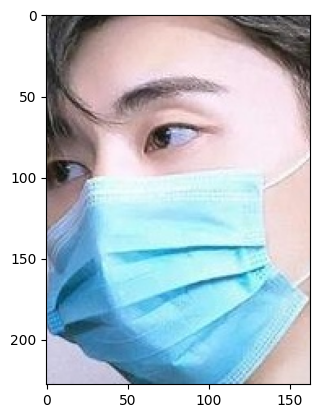

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

The code reads an image from a specified file path, creates a plot for the image using Matplotlib, and then displays it. This helps you visualize the "without mask" images from your dataset.

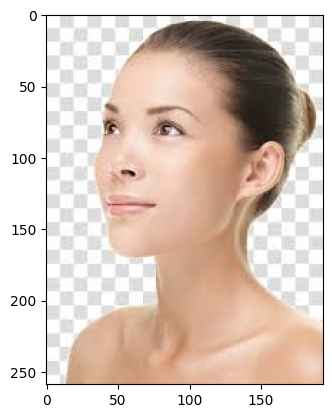

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

The code reads images from the specified directories, resizes them to 128x128 pixels, converts them to RGB mode, converts the images into NumPy arrays, and appends them to the data list. This prepares the images in a format suitable for machine learning tasks, such as training a model.

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


This line of code returns the type of the data variable.

In [ ]:
type(data)

list

The code snippet len(data) is used to check the number of elements in the data list.

In [ ]:
len(data)

7553

The code snippet data[0] retrieves and displays the first element from the data list.

array([[[ 99,  89,  87],
        [ 95,  85,  83],
        [ 90,  80,  78],
        ...,
        [139, 125, 112],
        [141, 127, 114],
        [142, 128, 115]],

       [[100,  90,  88],
        [ 97,  87,  85],
        [ 91,  81,  79],
        ...,
        [136, 122, 109],
        [137, 123, 110],
        [135, 121, 108]],

       [[102,  92,  90],
        [ 98,  88,  86],
        [ 93,  83,  81],
        ...,
        [132, 118, 105],
        [134, 120, 107],
        [134, 120, 107]],

       ...,

       [[232, 224, 213],
        [231, 223, 212],
        [230, 222, 211],
        ...,
        [240, 231, 216],
        [242, 233, 218],
        [243, 234, 219]],

       [[232, 224, 213],
        [231, 223, 212],
        [230, 222, 211],
        ...,
        [240, 231, 216],
        [242, 233, 218],
        [243, 234, 219]],

       [[232, 224, 213],
        [231, 223, 212],
        [230, 222, 211],
        ...,
        [240, 231, 216],
        [242, 233, 218],
        [244, 235, 220]]], dtype=uint8)
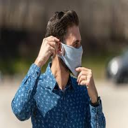

In [ ]:
data[0]

The code snippet type(data[0]) checks and prints the type of the first element in the data list.

In [ ]:
type(data[0])

numpy.ndarray

The code snippet data[0].shape is used to check and print the shape of the first element in the data list, which is a NumPy array representing an image.

In [ ]:
data[0].shape

(128, 128, 3)

The code converts the lists of images and labels into NumPy arrays. This format is essential for efficient computation and compatibility with machine learning libraries such as TensorFlow or PyTorch.

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

The code snippet type(X) checks and prints the type of the variable X.

In [ ]:
type(X)

numpy.ndarray

The code snippet type(Y) checks and prints the type of the variable Y.

In [ ]:
type(Y)

numpy.ndarray

The code snippets print(X.shape) and print(Y.shape) are used to check and print the shapes of the X and Y NumPy arrays.

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


This array will have a length equal to the total number of images (e.g., 7553) and will help you verify that the labels are correctly structured and aligned with your image data.

In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


# **Train Test Split**

his code snippet effectively splits your dataset into training and testing sets. The training set (X_train, Y_train) will be used to train your machine learning model, while the test set (X_test, Y_test) will be used to evaluate its performance.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

This verification step ensures that the data has been correctly split into training and test sets, maintaining the expected proportions and dimensions.

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


Scaling the data ensures that the pixel values are within a standard range, which can improve the efficiency and accuracy of machine learning algorithms. Normalized data typically results in better model performance.

By scaling the X_train and X_test data, you prepare the image data for input into a machine learning model, facilitating better training and evaluation outcomes.

In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

X_train[0] will display the first image in your training dataset.

array([[[173, 200, 119],
        [169, 196, 116],
        [167, 193, 118],
        ...,
        [178, 199,  94],
        [175, 196,  94],
        [170, 191,  90]],

       [[170, 197, 117],
        [167, 194, 115],
        [165, 191, 116],
        ...,
        [174, 196,  90],
        [169, 190,  88],
        [161, 182,  82]],

       [[164, 190, 114],
        [161, 188, 112],
        [160, 186, 111],
        ...,
        [170, 191,  86],
        [162, 182,  81],
        [154, 174,  75]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
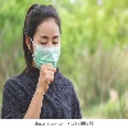

In [ ]:
X_train[0]

X_train_scaled[0] will display the first scaled image in your training dataset.

In [ ]:
X_train_scaled[0]

array([[[0.67843137, 0.78431373, 0.46666667],
        [0.6627451 , 0.76862745, 0.45490196],
        [0.65490196, 0.75686275, 0.4627451 ],
        ...,
        [0.69803922, 0.78039216, 0.36862745],
        [0.68627451, 0.76862745, 0.36862745],
        [0.66666667, 0.74901961, 0.35294118]],

       [[0.66666667, 0.77254902, 0.45882353],
        [0.65490196, 0.76078431, 0.45098039],
        [0.64705882, 0.74901961, 0.45490196],
        ...,
        [0.68235294, 0.76862745, 0.35294118],
        [0.6627451 , 0.74509804, 0.34509804],
        [0.63137255, 0.71372549, 0.32156863]],

       [[0.64313725, 0.74509804, 0.44705882],
        [0.63137255, 0.7372549 , 0.43921569],
        [0.62745098, 0.72941176, 0.43529412],
        ...,
        [0.66666667, 0.74901961, 0.3372549 ],
        [0.63529412, 0.71372549, 0.31764706],
        [0.60392157, 0.68235294, 0.29411765]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

# **Building a Convolutional Neural Networks (CNN)**

Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras

The purpose of the provided code is to build a Convolutional Neural Network (CNN) model using TensorFlow and Keras, designed to classify images into one of two classes (e.g., with mask or without mask).

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The code snippet compiles the neural network model, preparing it for training.

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

This step uses your prepared data to train the model over 10 epochs, with 10% of the training data used for validation.

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - acc: 0.6925 - loss: 0.7870 - val_acc: 0.8810 - val_loss: 0.2840
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8823 - loss: 0.3028 - val_acc: 0.8463 - val_loss: 0.3402
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8982 - loss: 0.2681 - val_acc: 0.9124 - val_loss: 0.2230
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9226 - loss: 0.1906 - val_acc: 0.9107 - val_loss: 0.2085
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9391 - loss: 0.1591 - val_acc: 0.9190 - val_loss: 0.2224
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - acc: 0.9466 - loss: 0.1420 - val_acc: 0.9223 - val_loss: 0.2379
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9543 - loss: 0.1203 - val_acc: 0.9207 - val_loss: 0.1991
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9597 - loss: 0.1243 - val_acc: 0.9157 - val_loss: 0.3151
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms

**Model Evaluation**

trained model will be tested on the unseen test data to determine its accuracy.

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9303 - loss: 0.2441
Test Accuracy = 0.929847776889801


**Training and Validation Loss:** These plots reveal the model's learning efficiency and how well it minimizes the error.

### **Training and Validation Accuracy:** These plots indicate the model's predictive performance over the epochs, helping you assess its effectiveness.

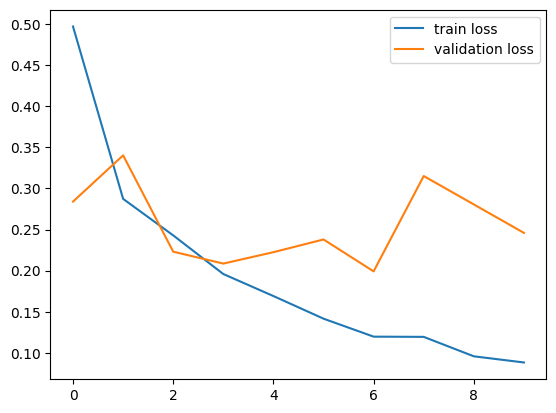

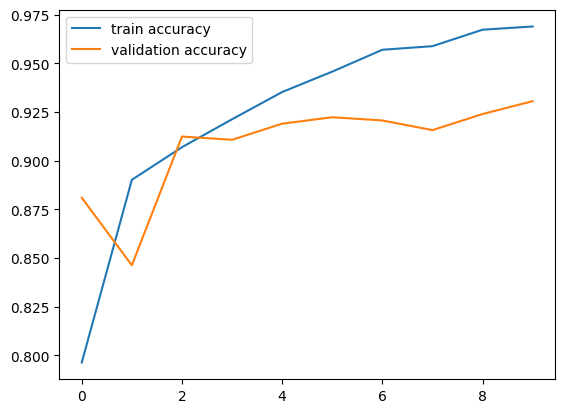

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

This code guides you through the process of loading an image, preprocessing it to match the model’s input requirements, making a prediction using your trained model, and interpreting the results.

Path of the image to be predicted: /content/images (1).jpeg


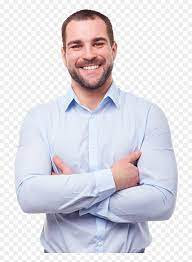

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
[[0.56920135 0.50399846]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test_image1.jpeg


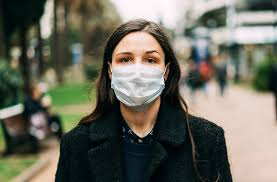

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.85442054 0.08617241]]
0
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')


### **Thank you**




### **Submitted By:- Deepak Vishwakarma**